From https://www.youtube.com/watch?v=QvcHrwXS4_U

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, WhiteKernel, ExpSineSquared as Exp, DotProduct as Lin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# About Kernels and Sums of Kernels
### WhiteKernel
* Part of a sum-kernel where it explains the noise of the signal as independently and identically normally-distributed. The parameter noise_level equals the variance of this noise.

### RBF aka squared-exponential kernel
* Parameters:
    * The length scale of the kernel. If a float, an isotropic kernel is used. If an array, an anisotropic kernel is used where each dimension of l defines the length-scale of the respective feature dimension.
    * The lower and upper bound on 'length_scale'. If set to “fixed”, ‘length_scale’ cannot be changed during hyperparameter tuning.

### ConstantKernel (C)
    * used as part of a Product kernel where it scales the magnitude of the other factor (kernel) or as part of a Sum kernel, where it modifies the mean of the Gaussian process. It depends on a parameter . It is defined as:


### User Defined Loss Function
- 

In [2]:
np.random.seed(1)


0. RUNNUMBER,
1. BEAM_CURRENT,
1. **CURRENT_MIN**,
1. **CURRENT_MEAN**,
1. **CURRENT_MAX**,
1. **CURRENT_SIGMA**,
1. PRESSURE,
1. PRESSURE_MIN,
1. **PRESSURE_MEAN**,
1. **PRESSURE_MAX**,
1. PRESSURE_SIGMA,
1. PSC_RATE,
1. PSC_MIN,
1. PSC_MEAN,
1. PSC_MAX,
1. PSC_SIGMA,
1. D1,
1. D1_MIN,
1. **D1_MEAN**,
1. **D1_MAX**,
1. D1_SIGMA,
1. D3,
1. D3_MIN,
1. D3_MEAN,
1. D3_MAX,
1. D3_SIGMA,
1. D4,
1. D4_MIN,
1. D4_MEAN,
1. D4_MAX,
1. D4_SIGMA,
1. D5,
1. D5_MIN,
1. D5_MEAN,
1. **D5_MAX**,
1. D5_SIGMA,
1. PRESSURE_MIN (MMHG),
1. **PRESSURE_MEAN (MMHG)**,
1. **PRESSURE_MAX (MMHG)**,
1. PRESSURE_SIGMA (MMHG),
1. AVG_TEMP,
1. CALIB_PRES,
1. GAS_DENSITY,
1. **MIN_A_MEAN**,
1. MIN_A_STD,
1. **MEAN_A_MEAN**,
1. MEAN_A_STD,
1. **MAX_A_MEAN**,
1. MAX_A_STD,
1. SIGMA_A_MEAN,
1. SIGMA_A_STD,
1. MIN_B_MEAN,
1. MIN_B_STD,
1. MEAN_B_MEAN,
1. MEAN_B_STD,
1. MAX_B_MEAN,
1. MAX_B_STD,
1. SIGMA_B_MEAN,
1. SIGMA_B_STD,
1. MIN_C_MEAN,
1. MIN_C_STD,
1. MEAN_C_MEAN,
1. MEAN_C_STD,
1. MAX_C_MEAN,
1. MAX_C_STD,
1. SIGMA_C_MEAN,
1. SIGMA_C_STD,
1. MIN_D_MEAN,
1. MIN_D_STD,
1. MEAN_D_MEAN,
1. MEAN_D_STD,
1. MAX_D_MEAN,
1. MAX_D_STD,
1. SIGMA_D_MEAN,
1. SIGMA_D_STD,
1. MIN_E_MEAN,
1. MIN_E_STD,
1. MEAN_E_MEAN,
1. MEAN_E_STD,
1. MAX_E_MEAN,
1. MAX_E_STD,
1. SIGMA_E_MEAN,
1. SIGMA_E_STD,
1. MIN_F_MEAN,
1. MIN_F_STD,
1. MEAN_F_MEAN,
1. MEAN_F_STD,
1. MAX_F_MEAN,
1. MAX_F_STD,
1. SIGMA_F_MEAN,
1. SIGMA_F_STD,
1. MIN_G_MEAN,
1. MIN_G_STD,
1. MEAN_G_MEAN,
1. MEAN_G_STD,
1. MAX_G_MEAN,
1. MAX_G_STD,
1. SIGMA_G_MEAN,
1. SIGMA_G_STD,
1. MIN_H_MEAN,
1. MIN_H_STD,
1. MEAN_H_MEAN,
1. MEAN_H_STD,
1. MAX_H_MEAN,
1. MAX_H_STD,
1. SIGMA_H_MEAN,
1. SIGMA_H_STD,
1. MIN_I_MEAN,
1. MIN_I_STD,
1. MEAN_I_MEAN,
1. MEAN_I_STD,
1. MAX_I_MEAN,
1. MAX_I_STD,
1. SIGMA_I_MEAN, 
1. SIGMA_I_STD,
1. **GAIN**,
1. INDEX,
1. THICKNESS,
1. ID,
1. **THICKNESS_RL**,
1. CALIB_PRES_MEAN,
1. CALIB_PRES_MAX,
1. CALIB_PRES_MIN,
1. **GAS_DENSITY_MEAN**,
1. **GAS_DENSITY_MAX**,
1. GAS_DENSITY_MIN,
1. **D1MAX_D5MAX_DIFF**,
1. **D1MEAN_D5MEAN_DIFF**,
1. RADLENGTH_OVER_PSC_MEAN,
1. PSC_MEAN_OVER_CURRENT_MEAN,
1. PSC_MAX_OVER_CURRENT_MAX,
1. **AMAX_IMAX_DIFF**,
1. MEAN_A_OVER_PSC_MEAN,
1. MAX_A_OVER_PSC_MAX,
1. **SUM_A_I_MEAN**,
1. **SUM_A_I_MAX**,
1. **A_MEAN_PLUS_STD**,
1. **A_MEAN_MINUS_STD**,
1. **A_MAX_PLUS_STD**,
1. **A_MAX_MINUS_STD**,
1. a1,
1. a2,
1. b1,
1. b2,
1. c1,
1. c2,
1. A1,
1. A2,
1. B1,
1. B2,
1. C1,
1. C2


In [3]:
df_Test_All = pd.read_csv('testHoldout_EO20182020_filtered_TToD.csv')
#df_Test_All.head(60)

In [65]:
cols = ['CURRENT_MIN','CURRENT_MEAN','CURRENT_MAX','CURRENT_SIGMA',
    'PRESSURE_MIN','PRESSURE_MEAN','PRESSURE_MAX','PRESSURE_SIGMA',
    'PSC_MIN','PSC_MEAN','PSC_MAX','PSC_SIGMA',
    'D1_MIN','D1_MAX','D1_MEAN','D1_SIGMA',
    'D3_MIN','D3_MAX','D3_MEAN','D3_SIGMA',
    'D4_MIN','D4_MAX','D4_MEAN','D4_SIGMA',
    'D5_MIN','D5_MAX','D5_MEAN','D5_SIGMA',
    'MIN_A_MEAN','MIN_A_STD','MEAN_A_MEAN','MEAN_A_STD','MAX_A_MEAN','MAX_A_STD','SIGMA_A_MEAN','SIGMA_A_STD',
    'MIN_B_MEAN','MIN_B_STD','MEAN_B_MEAN','MEAN_B_STD','MAX_B_MEAN','MAX_B_STD','SIGMA_B_MEAN','SIGMA_B_STD',
    'MIN_C_MEAN','MIN_C_STD','MEAN_C_MEAN','MEAN_C_STD','MAX_C_MEAN','MAX_C_STD','SIGMA_C_MEAN','SIGMA_C_STD',
    'MIN_D_MEAN','MIN_D_STD','MEAN_D_MEAN','MEAN_D_STD','MAX_D_MEAN','MAX_D_STD','SIGMA_D_MEAN','SIGMA_D_STD',
    'MIN_E_MEAN','MIN_E_STD','MEAN_E_MEAN','MEAN_E_STD','MAX_E_MEAN','MAX_E_STD','SIGMA_E_MEAN','SIGMA_E_STD',
    'MIN_F_MEAN','MIN_F_STD','MEAN_F_MEAN','MEAN_F_STD','MAX_F_MEAN','MAX_F_STD','SIGMA_F_MEAN','SIGMA_F_STD',
    'MIN_G_MEAN','MIN_G_STD','MEAN_G_MEAN','MEAN_G_STD','MAX_G_MEAN','MAX_G_STD','SIGMA_G_MEAN','SIGMA_G_STD',
    'MIN_H_MEAN','MIN_H_STD','MEAN_H_MEAN','MEAN_H_STD','MAX_H_MEAN','MAX_H_STD','SIGMA_H_MEAN','SIGMA_H_STD',
    'MIN_I_MEAN','MIN_I_STD','MEAN_I_MEAN','MEAN_I_STD','MAX_I_MEAN','MAX_I_STD','SIGMA_I_MEAN','SIGMA_I_STD',
    'THICKNESS_RL','AVG_TEMP',
    'CALIB_PRES_MEAN','CALIB_PRES_MAX','CALIB_PRES_MIN',
    'GAS_DENSITY_MEAN','GAS_DENSITY_MAX','GAS_DENSITY_MIN',
    'D1MAX_D5MAX_DIFF','D1MEAN_D5MEAN_DIFF',
    'RADLENGTH_OVER_PSC_MEAN','PSC_MEAN_OVER_CURRENT_MEAN','PSC_MAX_OVER_CURRENT_MAX',
    'AMAX_IMAX_DIFF','MEAN_A_OVER_PSC_MEAN','MAX_A_OVER_PSC_MAX',
    'SUM_A_I_MEAN','SUM_A_I_MAX',
    'A_MEAN_PLUS_STD','A_MEAN_MINUS_STD','A_MAX_PLUS_STD','A_MAX_MINUS_STD']

cols_target = ['GAIN']

# dataframes of both the X and y for training and test
df_train_X = pd.read_csv('trainValidate_EO20182020_filtered_TToD.csv', usecols = cols)
df_train_y = pd.read_csv('trainValidate_EO20182020_filtered_TToD.csv', usecols = cols_target)
df_test_X = pd.read_csv('testHoldout_EO20182020_filtered_TToD.csv', usecols = cols)
df_test_y = pd.read_csv('testHoldout_EO20182020_filtered_TToD.csv', usecols = cols_target)

# 2018: dataframes of both the X and y for training and test
#df_train_X_2018 = pd.read_csv('trainValidate_EO2018_filtered_TToD.csv', usecols = cols)
#df_train_y_2018 = pd.read_csv('trainValidate_EO2018_filtered_TToD.csv', usecols = cols_target)
#df_test_X_2018 = pd.read_csv('testHoldout_EO2018_filtered_TToD.csv', usecols = cols)
#df_test_y_2018 = pd.read_csv('testHoldout_EO2018_filtered_TToD.csv', usecols = cols_target)

# 2020: dataframes of both the X and y for training and test
#df_train_X_2020 = pd.read_csv('trainValidate_EO2020_filtered_TToD.csv', usecols = cols)
#df_train_y_2020 = pd.read_csv('trainValidate_EO2020_filtered_TToD.csv', usecols = cols_target)
#df_test_X_2020 = pd.read_csv('testHoldout_EO2020_filtered_TToD.csv', usecols = cols)
#df_test_y_2020 = pd.read_csv('testHoldout_EO2020_filtered_TToD.csv', usecols = cols_target)

In [5]:
# scale the input and output
# input
scaler_train_X = StandardScaler()
scaler_train_X.fit(df_train_X)
train_array_X = scaler_train_X.transform(df_train_X)
test_array_X = scaler_train_X.transform(df_test_X)

# output
scaler_train_y = StandardScaler()
scaler_train_y.fit(df_train_y)
train_array_y = scaler_train_y.transform(df_train_y)
test_array_y = scaler_train_y.transform(df_test_y)

In [6]:
#np asarray the scaled 
train_array_X = np.asarray(train_array_X)
test_array_X = np.asarray(test_array_X)

train_array_y = np.asarray(train_array_y)
test_array_y = np.asarray(test_array_y)


print(train_array_X.shape)
print(test_array_X.shape)
print(train_array_y.shape)
print(test_array_y.shape)

(665, 122)
(164, 122)
(665, 1)
(164, 1)


(array([ 0.,  0.,  0.,  0.,  0.,  2.,  3., 30., 26., 24., 21., 23., 16.,
         5.,  3.,  6.,  1.,  1.,  2.,  1.]),
 array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
         0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <BarContainer object of 20 artists>)

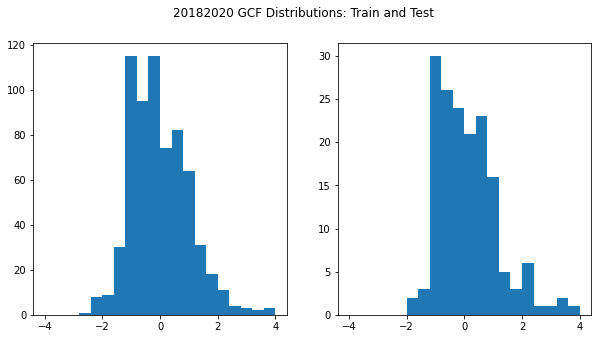

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('20182020 GCF Distributions: Train and Test')
ax1.hist(train_array_y, bins=20, range=[-4, 4])
ax2.hist(test_array_y, bins=20, range=[-4, 4])


#plt.hist(train_array_y, bins=20, range=[-4, 4])

In [68]:
#train features to use
current_min = train_array_X[:,0]
current_mean = train_array_X[:,1]
current_max = train_array_X[:,2]
current_sigma = train_array_X[:,3]


a_max_minus_std = train_array_X[:,121]
sum_a_i_max = train_array_X[:,117]
min_a_mean = train_array_X[:,28]
a_mean_minus_std = train_array_X[:,119]
sum_a_i_mean = train_array_X[:,116]
max_a_mean = train_array_X[:,32]
mean_a_mean = train_array_X[:,30]  
amax_minus_imax = train_array_X[:,114]

pressure_max = train_array_X[:,6]
pressure_mean = train_array_X[:,5] 

d5_max = train_array_X[:,25] 
d1_mean = train_array_X[:,14]
d1_max = train_array_X[:,13]  


# gcf is our target
gcf = train_array_y[:,0]

In [69]:
#test features to use
test_current_min = test_array_X[:,0]
test_current_mean = test_array_X[:,1]
test_current_max = test_array_X[:,2]
test_current_sigma= test_array_X[:,3]

test_a_max_minus_std = test_array_X[:,121]
test_sum_a_i_max = test_array_X[:,117]
test_min_a_mean= test_array_X[:,28]
test_a_mean_minus_std = test_array_X[:,119]
test_sum_a_i_mean = test_array_X[:,116]
test_max_a_mean = test_array_X[:,32]
mean_a_mean_test = test_array_X[:,30] 
amax_minus_imax_test = test_array_X[:,114] 

test_pressure_max = test_array_X[:,6]
test_pressure_mean = test_array_X[:,5]

test_d5_max= test_array_X[:,25]
test_d1_mean = test_array_X[:,14]  
test_d1_max = test_array_X[:,13]   

# gcf is our target
test_gcf = test_array_y[:,0]

In [52]:

# this is our training set as an array
#X_gcf = np.asarray([current_min,current_mean,current_max,a_max_minus_std,sum_a_i_max,current_sigma,min_a_mean,a_mean_minus_std,sum_a_i_mean,pressure_max]).T
#test_X_gcf = np.asarray([test_current_min,test_current_mean,test_current_max,test_a_max_minus_std,test_sum_a_i_max,test_current_sigma,test_min_a_mean,test_a_mean_minus_std,test_sum_a_i_mean,test_pressure_max]).T

X_gcf = np.asarray([current_min,current_mean,current_max,current_sigma,
    a_max_minus_std,sum_a_i_max,min_a_mean,a_mean_minus_std,sum_a_i_mean,max_a_mean,
    pressure_max,pressure_mean,
    d5_max,d1_mean,d1_max]).T
    
test_X_gcf = np.asarray([test_current_min,test_current_mean,test_current_max,test_current_sigma,
    test_a_max_minus_std,test_sum_a_i_max,test_min_a_mean,test_a_mean_minus_std,test_sum_a_i_mean,test_max_a_mean,
    test_pressure_max,test_pressure_mean,
    test_d5_max,test_d1_mean,test_d1_max]).T

# just current and pressure do not work with the RBF-only kernel
#X_gcf = np.asarray([current_min, current_mean, current_max, pressure_max, pressure_mean]).T
#test_X_gcf = np.asarray([test_current_min, test_current_mean, test_current_max, test_pressure_max, test_pressure_mean]).T

#print(X.shape)

y_gcf = np.asarray(gcf).T
test_y_gcf = np.asarray(test_gcf).T
#print(y)

# Instantiate a Gaussian Process model
# guessing at kernel
kernel = (C(1e-5) * RBF(10, (1e-2, 1e2))) + WhiteKernel(1e-2)
#kernel = (RBF(10, (1e-2, 1e2)))
# GP
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=50)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_gcf, y_gcf)


GaussianProcessRegressor(kernel=0.00316**2 * RBF(length_scale=10) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=50)

In [53]:
#gpr.score(X, y)
preds_gcf_stdv = gp.predict(test_X_gcf, return_std=True)
# predictions
preds_gcf = preds_gcf_stdv[0][:]
# stdv/uncertainty
preds_stdv = preds_gcf_stdv[1][:]

(array([ 0.,  0.,  0.,  0.,  0.,  2.,  3., 30., 26., 24., 21., 23., 16.,
         5.,  3.,  6.,  1.,  1.,  2.,  1.]),
 array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
         0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <BarContainer object of 20 artists>)

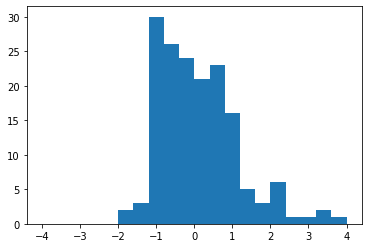

In [54]:
plt.hist(test_array_y, bins=20, range=[-4, 4])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  6., 21., 26., 29., 25., 23., 12.,
         7.,  4.,  6.,  4.,  0.,  0.,  0.]),
 array([-4. , -3.6, -3.2, -2.8, -2.4, -2. , -1.6, -1.2, -0.8, -0.4,  0. ,
         0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <BarContainer object of 20 artists>)

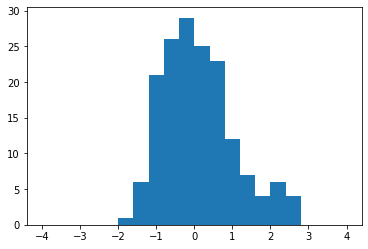

In [55]:
plt.hist(preds_gcf, bins=20, range=[-4, 4])

In [56]:
# need to invert the scale on preds_gcf
preds_inverse_gcf = scaler_train_y.inverse_transform(preds_gcf)

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  5., 22., 27., 32., 29., 17., 13.,
         7.,  3.,  6.,  2.,  0.,  0.,  0.]),
 array([0.11  , 0.1145, 0.119 , 0.1235, 0.128 , 0.1325, 0.137 , 0.1415,
        0.146 , 0.1505, 0.155 , 0.1595, 0.164 , 0.1685, 0.173 , 0.1775,
        0.182 , 0.1865, 0.191 , 0.1955, 0.2   ]),
 <BarContainer object of 20 artists>)

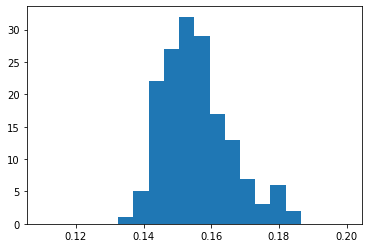

In [57]:
plt.hist(preds_inverse_gcf, bins=20, range=[0.11, 0.2])

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  4., 30., 26., 24., 25., 19., 18.,
         3.,  4.,  5.,  1.,  1.,  3.,  0.]),
 array([0.11  , 0.1145, 0.119 , 0.1235, 0.128 , 0.1325, 0.137 , 0.1415,
        0.146 , 0.1505, 0.155 , 0.1595, 0.164 , 0.1685, 0.173 , 0.1775,
        0.182 , 0.1865, 0.191 , 0.1955, 0.2   ]),
 <BarContainer object of 20 artists>)

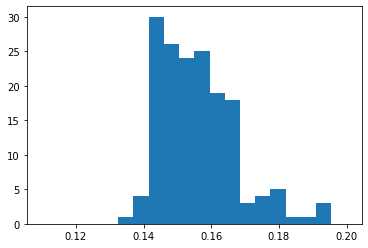

In [58]:
plt.hist(df_test_y['GAIN'], bins=20, range=[0.11, 0.2])

In [59]:
preds_stdv.max()

0.9331159519064616

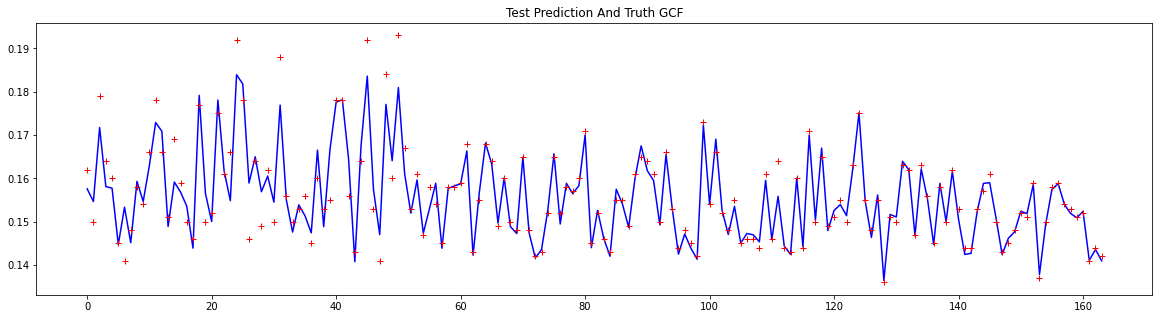

In [60]:
plt.subplots(figsize=(20, 5))
plt.plot(preds_inverse_gcf, 'b')
#plt.fill_between(X_gcf[:, 0], alpha=0.3)

# Plot samples from posterior
#plt.plot(X_gcf[:, 0], X_gcf[:, 0])

# Also plot our observations for comparison
plt.plot(df_test_y['GAIN'], 'r+')

plt.title('Test Prediction And Truth GCF')
plt.show()

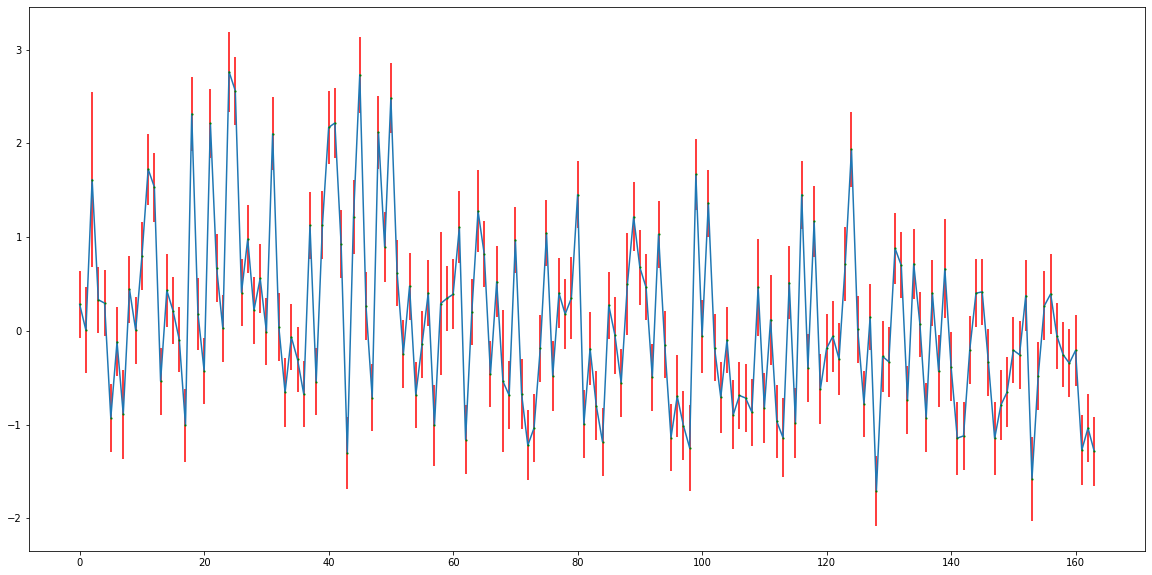

In [61]:
plt.subplots(figsize=(20, 10))

plt.errorbar(range(164), preds_gcf, preds_stdv, ecolor='r', marker='s', mfc='red', mec='green', ms=1, mew=1)

plt.show()

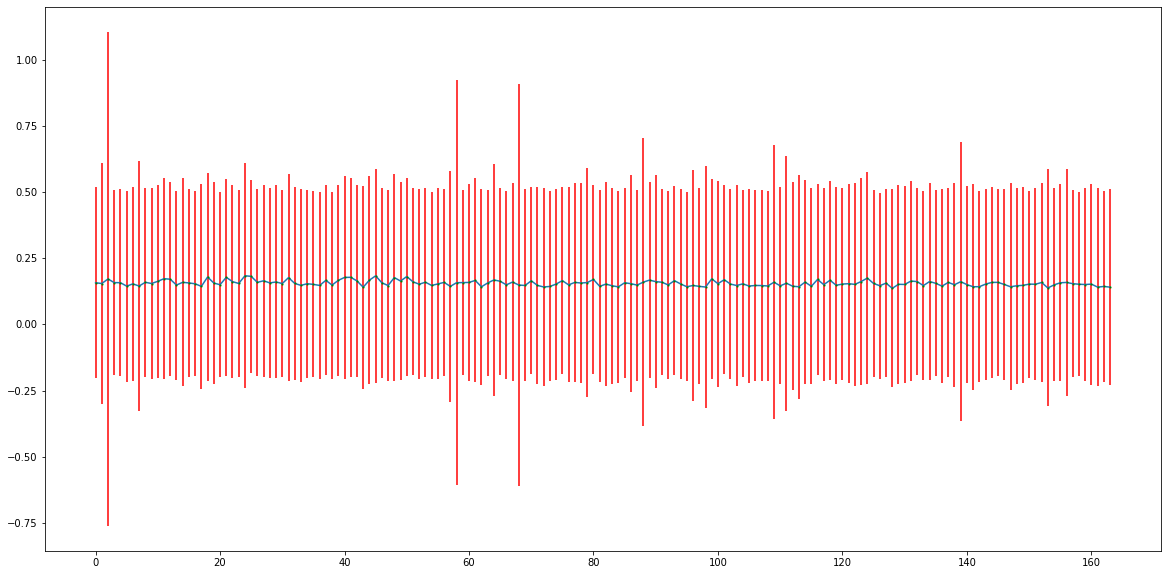

In [62]:
plt.subplots(figsize=(20, 10))

plt.errorbar(range(164), preds_inverse_gcf, preds_stdv, ecolor='r', marker='s', mfc='red', mec='green', ms=1, mew=1)

plt.show()

In [63]:
truth_pred_dif = abs(df_test_y['GAIN'] - preds_inverse_gcf)
perc_dif = abs(df_test_y['GAIN'] - preds_inverse_gcf) / df_test_y['GAIN']

print("Minimum Different Between Truth and Pred: {:f}".format(truth_pred_dif.min()))
print("Maximum Different Between Truth and Pred: {:f}".format(truth_pred_dif.max()))
print("Mean Different Between Truth and Pred: {:f}".format(truth_pred_dif.mean()))

print("Minimum Perc Dif: {:f}".format(perc_dif.min()))
print("Maximum Perc Dif: {:f}".format(perc_dif.max()))
print("Mean Perc Dif: {:f}".format(perc_dif.mean()))


# what percent dif would using the average give us?
mean_gcf = df_test_y['GAIN'].mean()
print("Mean GCF: {}".format(mean_gcf))

print("-" * 30)
print("IF WE JUST USED THE MEAN GAIN:")
truth_meantruth_dif = df_test_y['GAIN']  - mean_gcf
truth_meantruth_perc_dif = abs(truth_meantruth_dif) / df_test_y['GAIN']
print("Minimum Perc Dif Between Truth and Mean Truth: {:f}".format(truth_meantruth_perc_dif.min()))
print("Maximum Perc Dif Between Truth and Mean Truth: {:f}".format(truth_meantruth_perc_dif.max()))
print("Mean Perc Dif Between Truth and Mean Truth: {:f}".format(truth_meantruth_perc_dif.mean()))

Minimum Different Between Truth and Pred: 0.000003
Maximum Different Between Truth and Pred: 0.012935
Mean Different Between Truth and Pred: 0.002180
Minimum Perc Dif: 0.000020
Maximum Perc Dif: 0.088599
Mean Perc Dif: 0.013650
Mean GCF: 0.15591463414634146
------------------------------
IF WE JUST USED THE MEAN GAIN:
Minimum Perc Dif Between Truth and Mean Truth: 0.000547
Maximum Perc Dif Between Truth and Mean Truth: 0.192152
Mean Perc Dif Between Truth and Mean Truth: 0.054016


(array([ 1.,  0.,  0.,  0.,  1.,  1.,  3.,  2.,  2.,  4.,  5.,  2.,  2.,
         3.,  3.,  8., 13., 17., 17., 80.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

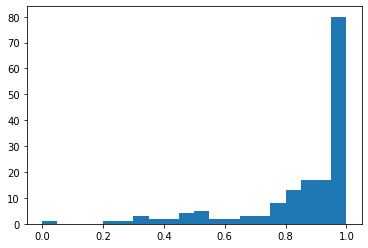

In [23]:
plt.hist(preds_stdv, bins=20, range=[0,1])